# CS 3300 Data Science - Exam 1

## Stuart Harley

### Part I: Introduction and Background

Conservation ecology deals with the preservation and management of biodiversity and natural resources. Because of the dramatic effect humans have on our environments, there is an accelerating deterioration of natural systems and a worlldwide epidemic of species extinctions. The goal of conservation ecology is to attempt to conserve species, habitats, and ecosystems. An important part of this field is the tracking of species' populations in order to determine if the species is at risk.

There are 4 general approaches that are used to monitor or estimate population sizes. They are complete/total counts, incomplete counts, mark-recapture, and indirect counts. Each has their own advantages and disadvantages but in this examination we will be focusing on indirect counts. Indirect counts are used when it is often impossible to obtain visual or auditory counts of the animals in a population. Indirect signs of the animals are used as indices of relative abundance. This means that the abundance of these signs can tell whether a population is increasing, decreasing, or stable. The indirect sign we will be dealing with is scat.

The coyote, bobcat, and gray fox are all common mammalian mesopredators that can are often found within the same regions of the United States. All three species have a conservation status of "least concern", so they are not protected species or at risk of extinction. Since these are elusive animals, conservation ecologists track their populations with their scat because they are easily located in the field and their collection generally causes little disturbance.

Historically, scat has been identified as belonging to specific species by its morphology (its form). However, the morphological distinctions between scats of coyotes, bobcats, and gray foxes are difficult to discern or properly identify because of the similarities between these animals. Therefore, biogeochemical and contextual traits can also be used to determine the species or origin for these scat samples. In this examination we will be attempting to determine which, if any, morphological and biogeochemical traits distinguish between originating species of the scat samples. We will also attempt to answer why.

Hypothesis: Differences in the morphological and biogeochemical traits of scat samples makes it possible to distinguish between scat samples of coyotes, bobcats, and gray foxes.

### Part II: Analysis

Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Loading in the scat dataset. This dataset contains the morphological, biochemical, and contextual traits of a set of 110 DNA-verified scat samples from coyotes, bobcats, and gray foxes. Location describes the scat location on the trail/road. Number refers to the number of scat pieces in the sample. TI is the ratio of taper length to scat diameter. d13C is a measure of the carbon in the scat and d15N is a measure of the Nitrogen in the scat. These two measures are combined into CN which is the Carbon:Nitrogen ratio of the scat.

In [2]:
df = pd.read_csv('scat.csv')

Converting columns to the correct types.

In [3]:
df['Species'] = df['Species'].astype('category')
df['Month'] = df['Month'].astype('category')
df['Site'] = df['Site'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Age'] = df['Age'].astype('category')
df['Number'] = df['Number'].astype('category')
df['ropey'] = df['ropey'].map(lambda x: x==1)
df['segmented'] = df['segmented'].map(lambda x: x==1)
df['flat'] = df['flat'].map(lambda x: x==1)
df['scrape'] = df['scrape'].map(lambda x: x==1)

There are several anomolies in the data. 19 different samples have missing values (NaN) for one or more variables and therefore should be excluded from any models or calculations involving those variables. These samples did were missing these measurements because the scat had irregular morphologies that rendered those measurements irrelevant. These entries were coded as flat. Therefore, I am dropping any rows that contain NaN values. Also, I will not be evaluating the flat feature as a trait since it is really just an indicator that other information was not able to be collected.

In [4]:
df = df.dropna()

In [5]:
df.head()

,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,ropey,segmented,flat,scrape
0,coyote,January,2012,YOLA,edge,5,2,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,False,False,False,False
1,coyote,January,2012,YOLA,edge,3,2,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,False,False,False,False
2,bobcat,January,2012,YOLA,middle,3,2,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,True,True,False,True
3,coyote,January,2012,YOLA,middle,5,2,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,True,False,False,False
4,coyote,January,2012,YOLA,edge,5,4,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,False,True,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 109
Data columns (total 19 columns):
Species      91 non-null category
Month        91 non-null category
Year         91 non-null int64
Site         91 non-null category
Location     91 non-null category
Age          91 non-null category
Number       91 non-null category
Length       91 non-null float64
Diameter     91 non-null float64
Taper        91 non-null float64
TI           91 non-null float64
Mass         91 non-null float64
d13C         91 non-null float64
d15N         91 non-null float64
CN           91 non-null float64
ropey        91 non-null bool
segmented    91 non-null bool
flat         91 non-null bool
scrape       91 non-null bool
dtypes: bool(4), category(6), float64(8), int64(1)
memory usage: 9.2 KB


Below is a table categorizing each variable as morphological, biogeochemical, contextual, or not a trait.

| Morphological | Biogeochemical | Contextual | Not a trait |
| --- | --- | --- | --- |
| | | | Species |
| | | Month | |
| | | Year | |
| | | Site | |
| | | Location | |
| Age | | | |
| Number | | | |
| Length | | | |
| Diameter | | | |
| Taper | | | |
| TI | | | |
| Mass | | | |
| | d13C | | |
| | c15N | | |
| | CN | | |
| Ropey | | | |
| Segmented | | | |
| | | | Flat |
| | | Scrape | |

Evaluating the relationships between the morphological and biogeochemical traits and species. I assume normality of the traits since this was tested by Rachel Reid in her paper. The only 2 variables that did not meet the normality assumption in her testing were mass and C:N ratio. Therefore, I also assume d13C and d15N do not meet the assumption of normality.

Below, for each trait I use the appropriate plot to plot each trait against the species feature. Then I perform the appropriate statistical test for each trait against the species feature.

In [7]:
df['count'] = 1

- Age - Heatmap & Chi Squared Test of Independence

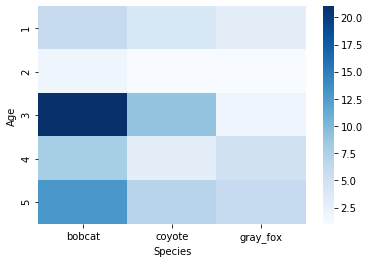

In [8]:
df2 = df.groupby(['Species', 'Age'], as_index=False).count()
sns.heatmap(pd.pivot_table(df2, 'count', 'Age', 'Species'), cmap="Blues");

In [9]:
combination_counts = df[['Species', 'Age']]\
                    .groupby(by=['Species', 'Age'])\
                    .size().unstack(level=0).fillna(0)
chi2, age_p, dof, expected = stats.chi2_contingency(combination_counts)
print('p-value: ' + str(age_p))

p-value: 0.6436774025091659


- Number - Heatmap & Chi Squared Test of Independence

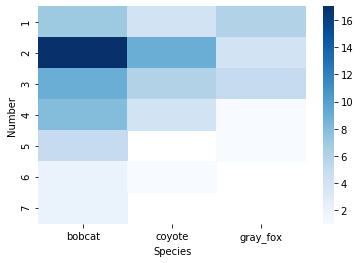

In [10]:
df2 = df.groupby(['Species', 'Number'], as_index=False).count()
sns.heatmap(pd.pivot_table(df2, 'count', 'Number', 'Species'), cmap="Blues");

In [11]:
combination_counts = df[['Species', 'Number']]\
                    .groupby(by=['Species', 'Number'])\
                    .size().unstack(level=0).fillna(0)
chi2, number_p, dof, expected = stats.chi2_contingency(combination_counts)
print('p-value: ' + str(number_p))

p-value: 0.5715835863103205


- Length - Boxplot & 1-way ANOVA

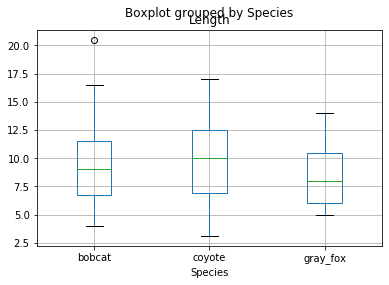

In [12]:
df.boxplot(by='Species', column='Length');

In [13]:
samples_by_species = []
for value in set(df['Species']):
    mask = df['Species'] == value
    samples_by_species.append(df['Length'][mask])
stat, length_p = stats.f_oneway(*samples_by_species)
print('p-value: ' + str(length_p))

p-value: 0.376070355639486


- Diameter - Boxplot & 1-way ANOVA

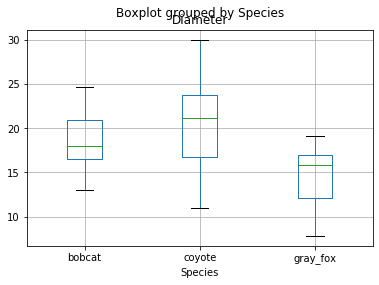

In [14]:
df.boxplot(by='Species', column='Diameter');

In [15]:
samples_by_species = []
for value in set(df['Species']):
    mask = df['Species'] == value
    samples_by_species.append(df['Diameter'][mask])
stat, diameter_p = stats.f_oneway(*samples_by_species)
print('p-value: ' + str(diameter_p))

p-value: 4.342371577233711e-06


- Taper - Boxplot & 1-way ANOVA

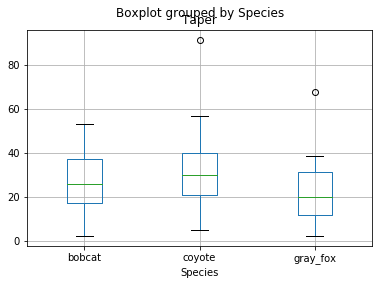

In [16]:
df.boxplot(by='Species', column='Taper');

In [17]:
samples_by_species = []
for value in set(df['Species']):
    mask = df['Species'] == value
    samples_by_species.append(df['Taper'][mask])
stat, taper_p = stats.f_oneway(*samples_by_species)
print('p-value: ' + str(taper_p))

p-value: 0.07543946700796307


- TI (Taper-length to scat diameter ratio) - Boxplot & 1-way ANOVA

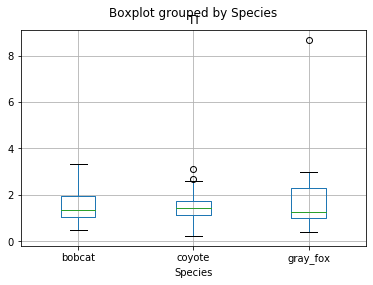

In [18]:
df.boxplot(by='Species', column='TI');

In [19]:
samples_by_species = []
for value in set(df['Species']):
    mask = df['Species'] == value
    samples_by_species.append(df['TI'][mask])
stat, ti_p = stats.f_oneway(*samples_by_species)
print('p-value: ' + str(ti_p))

p-value: 0.3471629419168677


- Mass - Boxplot & Krustak-Wallis Test

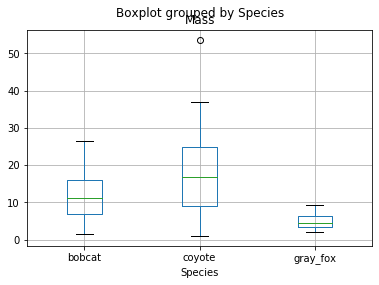

In [20]:
df.boxplot(by='Species', column='Mass');

In [21]:
samples_by_species = []
for value in set(df['Species']):
    mask = df['Species'] == value
    samples_by_species.append(df['Mass'][mask])
stat, mass_p = stats.kruskal(*samples_by_species)
print('p-value: ' + str(mass_p))

p-value: 3.0076046880910635e-06


- d13C - Boxplot & Krustak-Wallis Test

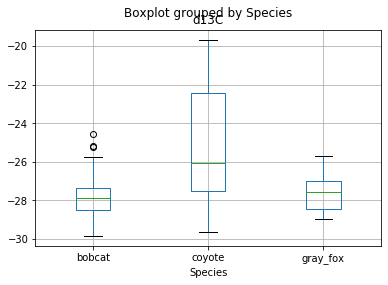

In [22]:
df.boxplot(by='Species', column='d13C');

In [23]:
samples_by_species = []
for value in set(df['Species']):
    mask = df['Species'] == value
    samples_by_species.append(df['d13C'][mask])
stat, d13C_p = stats.kruskal(*samples_by_species)
print('p-value: ' + str(d13C_p))

p-value: 0.0006792027304102746


- d15N - Boxplot & Krustak-Wallis Test

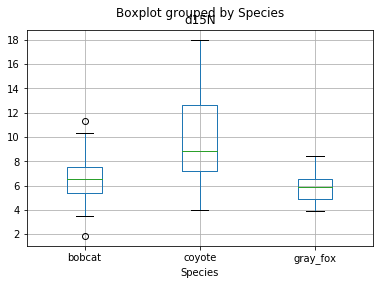

In [24]:
df.boxplot(by='Species', column='d15N');

In [25]:
samples_by_species = []
for value in set(df['Species']):
    mask = df['Species'] == value
    samples_by_species.append(df['d15N'][mask])
stat, d15N_p = stats.kruskal(*samples_by_species)
print('p-value: ' + str(d15N_p))

p-value: 1.7617323237023882e-05


- C:N Ratio - Boxplot & Krustal-Wallis Test

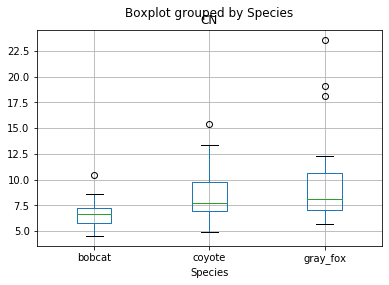

In [26]:
df.boxplot(by='Species', column='CN');

In [27]:
samples_by_species = []
for value in set(df['Species']):
    mask = df['Species'] == value
    samples_by_species.append(df['CN'][mask])
stat, CN_p = stats.kruskal(*samples_by_species)
print('p-value: ' + str(CN_p))

p-value: 1.733511280849129e-05


- Ropey - Heatmap & Chi Squared Test of Independence

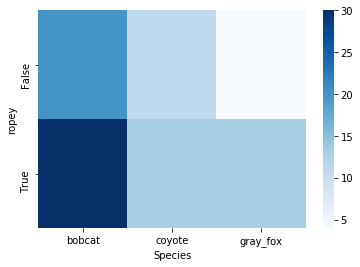

In [28]:
df2 = df.groupby(['Species', 'ropey'], as_index=False).count()
sns.heatmap(pd.pivot_table(df2, 'count', 'ropey', 'Species'), cmap="Blues");

In [29]:
combination_counts = df[['Species', 'ropey']]\
                    .groupby(by=['Species', 'ropey'])\
                    .size().unstack(level=0).fillna(0)
chi2, ropey_p, dof, expected = stats.chi2_contingency(combination_counts)
print('p-value: ' + str(ropey_p))

p-value: 0.33245321769363256


- Segmented - Heatmap & Chi Squared Test of Independence

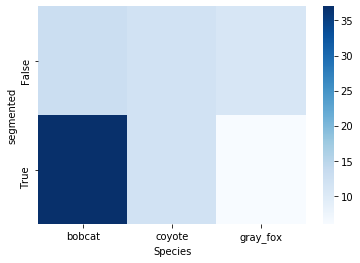

In [30]:
df2 = df.groupby(['Species', 'segmented'], as_index=False).count()
sns.heatmap(pd.pivot_table(df2, 'count', 'segmented', 'Species'), cmap="Blues");

In [31]:
combination_counts = df[['Species', 'segmented']]\
                    .groupby(by=['Species', 'segmented'])\
                    .size().unstack(level=0).fillna(0)
chi2, segmented_p, dof, expected = stats.chi2_contingency(combination_counts)
print('p-value: ' + str(segmented_p))

p-value: 0.008938136966029308


### Part III: Discussion and Interpretation

Below is a table of traits that separate at least one species from the rest. I determined this by looking at the p-values of the traits and their associated statistical tests. I am assuming a p-value threshold of .01, but a threshold of .05 would have made no difference. I am also including the mean plus/minus the standard deviation for each species category. (Standard deviation is not applicable to boolean traits). While both the d13C and d15N columns were by this metric predictive, I am only going to continue forward with only the CN ratio which combines the two since this was also predictive.

In [32]:
bobcat_df = df[df['Species']=='bobcat']
coyote_df = df[df['Species']=='coyote']
fox_df = df[df['Species']=='gray_fox']
# bobcat_df.mean() , coyote_df.mean(), fox_df.mean()
# bobcat_df.std(), coyote_df.std(), fox_df.std()

| Predictive Trait | p-value | Bobcat Mean ± Std Dev | Coyote Mean ± Std Dev | Gray Fox Mean ± Std Dev |
| --- | --- | --- | --- | --- |
| Diameter | 4.342e-06 | 18.60±2.71 | 20.47±4.71 | 14.67±3.36 |
| Mass | 3.007e-06 | 12.11±6.25 | 18.65±12.62 | 5.02±2.20 |
| C:N Ratio | 1.733e-05 | 6.64±1.10 | 8.58±2.48 | 10.28±5.16 |
| Segmented | 8.938e-03 | 74% | 50% | 35.29% |

For the diameter trait, coyotes had the largest diameter followed closely by bobcats, and then the smallest was gray foxes. This makes sense since coyotes weigh between 22 to 45 pounds, bobcats weigh between 9 to 33 pounds, and gray foxes are smallest weighing between 7 to 14 pounds. Since gray foxes weigh least, their scat should be smaller, aka a smaller diameter, while bobcats and coyotes' scat is a larger diameter because they are larger animals.

The same principle holds true for the mass of the scats. The coyotes are the largest so they have the heaviest scat. Followed by the bobcats which have the next heaviest scats and then the gray foxes have the lightest scats.

The C:N ratio depends on the diet of the animal. Animals that are strictly carnivores have a lower C:N ratio while herbivores have higher C:N ratios. This is because terrestrial plants tend to have high C:N ratios, while animals tend to be much more nutrient rich and therefore have much lower C:N ratios. Therefore, bobcats, which are obligatory predators, have the lowest C:N ratio. Compared to coyotes and gray foxes which both incorporate plants, mainly fruits, into their diets, which causes them to have higher C:N ratios.

In terms of the scats being segemented, I would assume that the diet of the animals would also affect this in the same way as the C:N ratio. Aka the carnivores are more likely to have segmented feces while the animals that incorporate more plant matter into their diets are less likely to have segmented feces.

Predictive morphological and biogeochemical traits might be more useful than contextual traits to ecologists. This is because contextual traits do not generalize well for models. Also, contextual information is often lacking, particularily when many scats are collected at once. It can be easy to miss a small scrape or track or other piece of contextual information. Also, the landscape is affected by weather conditions and other animals which can interfere with contextual information. In comparison, since you are collected the scats, you are able to analyze them precisely once they are back in a lab. All that is required for accurate results is to find the scat in the first place and complete an appropriate analysis.

### IV: Conclusion

Given the results of the statistical tests, it is shown that there are statistically significant differences between the morphological and biogeochemical traits of bobcat, coyote, and gray fox scat that likely separates them enough to somewhat accurately classify the scats by species. Specifically these traits are diameter, mass, C:N ratio, and whether or not the scat is segmented. In order to continue or expand on this work, someone could be use these traits to make a model that could be used to predict which species produced collected scat. This model could help conservational ecologists more easily classify between bobcat, coyote, and gray wolf scat which could allow them to spend the resources they would have had to spend on this classification elsewhere.

### References

NCSU. Estimating Wildlife Populations. https://projects.ncsu.edu/cals/course/fw353/Estimate.htm

Reid, R. A Morphometric Modeling Approach to Distiguishing among Bobcat, Coyote, and Gray Fox Scats. Wildlife Biology, 21(5): 254-262. https://doi.org/10.2981/wlb.00105

Smithsonian's National Zoo & Conservation Biology Institute. Bobcat. https://nationalzoo.si.edu/animals/bobcat

SUNY ESF. Gray Fox. https://www.esf.edu/aec/adks/mammals/gray_fox.htm

Texas AgriLife Extension. Managing Suburban Coyotes. https://agrilife.org/txwildlifeservices/files/2016/08/SuburbanCoyotes.pdf